# Geometric Distribution
## *If I throw 1000 darts at the number line between 1 and 10,000, how far apart do we expect them to be?*

In [86]:
import random
import math

line_len = 10000
num_darts = 1000

## Initialize with 1000 0s to mark no darts there
line = [0 for x in xrange(line_len)]

print "throwing darts..."
for i in xrange(num_darts):
    pos = random.randint(0,line_len-1)
    line[pos] += 1
    
    if (i < 10):
        print "%d: %d" % (i, pos)
    

print "The maximum number of darts at one position was %d" % (max(line))

throwing darts...
0: 864
1: 6744
2: 6311
3: 1149
4: 5035
5: 3894
6: 675
7: 4828
8: 4350
9: 9133
The maximum number of darts at one position was 3


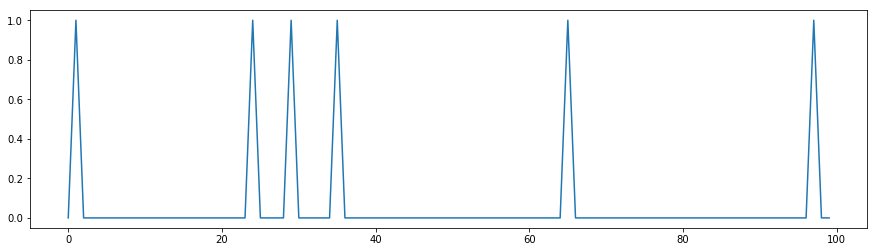

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [87]:
plt.figure(figsize=(15,4))
plt.plot(range(100), line[0:100])
plt.show()
print line[0:100]

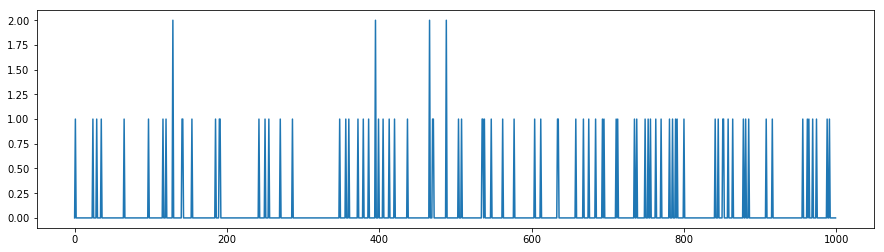

In [88]:
plt.figure(figsize=(15,4))
plt.plot(range(1000), line[0:1000])
plt.show()

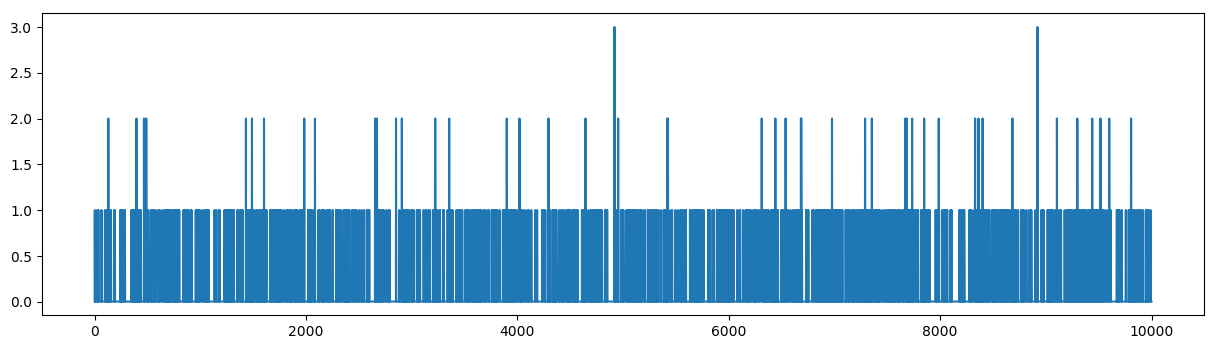

In [89]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(range(line_len), line)
plt.show()

In [90]:
## compute the distances between darts
distances = []

last_dart = 0

for i in xrange(line_len):
    if (line[i] > 0):
        dist = i - last_dart
        distances.append(dist)
        
        if (line[i] > 1):
            for dd in xrange(line[i]-1):
                distances.append(0)
            
        last_dart = i

distances.append(line_len - last_dart)

mean = (sum(distances) + 0.) / len(distances)
expected_mean = float(line_len) / num_darts
print "The observed mean distance was %.02f and the expected mean was %.02f" % (mean, expected_mean)

The observed mean distance was 9.99 and the expected mean was 10.00


### The expected mean distance is intuitive, but what do we expect for the standard deviation and the shape of the distribution?

In [91]:
import numpy as np
stdev = np.std(distances)

print "The range in distances was %d to %d" % (min(distances), max(distances))
print "The mean distance between darts was: %.02f +/- %.02f" % (mean, stdev)
print "The expected mean distances was %.02f" % (float(line_len) / num_darts)

The range in distances was 0 to 73
The mean distance between darts was: 9.99 +/- 10.01
The expected mean distances was 10.00


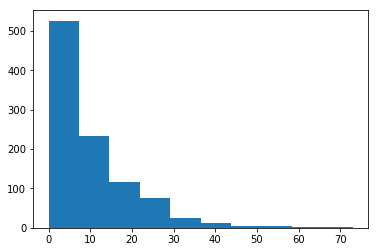

In [92]:
plt.figure()
plt.hist(distances)
plt.show()

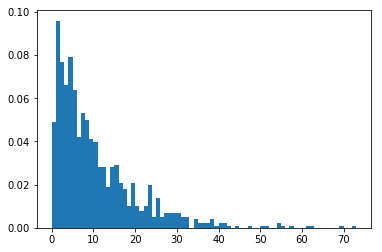

In [93]:
plt.figure()
plt.hist(distances, bins=range(max(distances)+1), normed=True)
plt.show()

## What happens if you increase the number of darts or the length of the number line?

## Notice that the probability of a given dart landing at a given spot is 

$$
p = \text{line_len} / \text{num_darts} \text{ (10%)}
$$

So the probability of a given dart not landing at the next position is

$$
1-p \text{ (90%)}
$$

And the probability of not having 2 darts in a row is

$$
(1-p)^2 \text{ (90% * 90% = .81%) }
$$

And not having 3 in a row

$$
(1-p)^3 \text{ (90% * 90% * 90% = 72.9%) }
$$

So the probability of not having several darts in a row followed by 1 dart is

$$
pdf = (1-p)^{k} p
$$

## This is called the geometric distribution

In [94]:
p = .1
geom_dist = []
for i in xrange(max(distances)+1):
    geom_prob = (1-p)**i * p
    geom_dist.append(geom_prob)

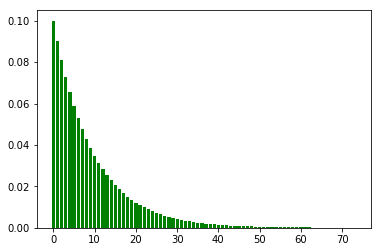

In [95]:
plt.figure()
plt.bar(range(len(geom_dist)), geom_dist, color="green")
plt.show()

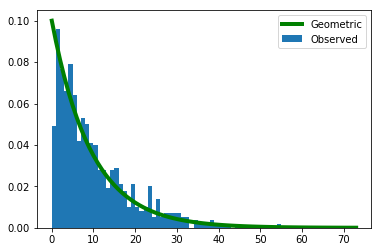

In [96]:
plt.figure()
plt.hist(distances, bins=range(max(distances)+1), normed=True, label="Observed")
plt.plot(range(len(geom_dist)), geom_dist, color="green", linewidth=4, label="Geometric")
plt.legend()
plt.show()

### Properties of geometric distribution
$$
mean=1/p
$$

(also p=1/expected_mean)

$$
stdev=\sqrt{(1-p)/p^2}
$$

In [97]:
expected_stdev = math.sqrt((1-p)/(p**2))
print "The expected stdev was %.02f and we observed %.02f" % (expected_stdev, stdev)

The expected stdev was 9.49 and we observed 10.01


### The geometric distribution can be well approximated by an exponential distribution

$$
pdf(x) = p * e^{-p * x}
$$

In [98]:
p = .1
exp_dist = []
for i in xrange(max(distances)+1):
    exp_prob = p * math.exp(-p * i)
    exp_dist.append(exp_prob)

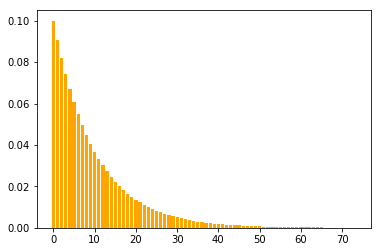

In [99]:
plt.figure()
plt.bar(range(len(exp_dist)), exp_dist, color="orange")
plt.show()

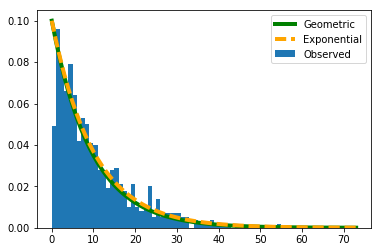

In [100]:
plt.figure()
plt.hist(distances, bins=range(max(distances)+1), normed=True, label="Observed")
plt.plot(range(len(geom_dist)), geom_dist, color="green", linewidth=4, label="Geometric")
plt.plot(range(len(exp_dist)),  exp_dist, color="orange", linewidth=4, linestyle="dashed", label="Exponential")
plt.legend()
plt.show()

## *What does this imply when we see "clusters" of events?*